In [1]:
import sys
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot 

level = 'andamento-nazionale'

path_data = '../data'
path_img_root =  f'{path_data}/imgs/grafici/{level}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/covid19-{level}.csv'

In [2]:
df_n_raw = pd.read_csv(csv_in_name)
df_n_raw;
df_n_raw.columns

Index(['data', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'ingressi_terapia_intensiva',
       'totale_positivi_test_molecolare',
       'totale_positivi_test_antigenico_rapido', 'tamponi_test_molecolare',
       'tamponi_test_antigenico_rapido', 'variazione_terapia_intensiva',
       'variazione_ricoverati_con_sintomi', 'variazione_totale_ospedalizzati',
       'variazione_isolamento_domiciliare', 'nuovi_dimessi_guariti',
       'nuovi_deceduti', 'nuovi_tamponi', 'nuovi_casi_testati', 'ti_su_to',
       'to_su_tp', 'np_su_nt', 'np_su_nct', 'var_ti_perc', 'var_pos_perc'],
      dtype='object')

In [3]:
# df_n[-2:].iloc[:, 1:]
df_last = df_n_raw[-1:]

In [4]:
# Print stats
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 2) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 11252
Nuovi tamponi: 213364.0
Percentuale nuovi positivi/nuovi tamponi: 5.0 %
Nuovi guariti: 20396.0
Nuovi deceduti: 237.0
Variazione positivi ricoverati con sintomi: -2.0
Variazione positivi in terapia intensiva: -3.0
Variazione positivi in isolamento dimiciliare: -9379.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_n_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 31, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_dimessi_guariti,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-02T17:00:00,32454,3616,36070,725160,761230,-18715,20709,823335,57045,...,38740.0,684.0,207143.0,95599.0,10.02,4.74,10.00,21.66,-1.28,-2.40
1,2020-12-03T17:00:00,31772,3597,35369,724613,759982,-1248,23225,846809,58038,...,23474.0,993.0,220047.0,97592.0,10.17,4.65,10.55,23.80,-0.53,-0.16
2,2020-12-04T17:00:00,31200,3567,34767,722935,757702,-2280,24099,872385,58852,...,25576.0,814.0,212741.0,83491.0,10.26,4.59,11.33,28.86,-0.83,-0.30
3,2020-12-05T17:00:00,30158,3517,33675,720494,754169,-3533,21052,896308,59514,...,23923.0,662.0,194984.0,894721.0,10.44,4.47,10.80,2.35,-1.40,-0.47
4,2020-12-06T17:00:00,30391,3454,33845,721461,755306,1137,18887,913494,60078,...,17186.0,564.0,163550.0,-732995.0,10.21,4.48,11.55,-2.58,-1.79,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-01-27T17:00:00,21161,2352,23513,454456,477969,-4448,15204,1936289,86889,...,19172.0,467.0,293770.0,88275.0,10.00,4.92,5.18,17.22,-0.84,-0.92
57,2021-01-28T17:00:00,20778,2288,23066,451551,474617,-3352,14372,1953509,87381,...,17220.0,492.0,275579.0,96755.0,9.92,4.86,5.22,14.85,-2.72,-0.70
58,2021-01-29T17:00:00,20397,2270,22667,445157,467824,-6793,13574,1973388,87858,...,19879.0,477.0,268750.0,81172.0,10.01,4.85,5.05,16.72,-0.79,-1.43
59,2021-01-30T17:00:00,20098,2218,22316,441036,463352,-4472,12715,1990152,88279,...,16764.0,421.0,298010.0,89375.0,9.94,4.82,4.27,14.23,-2.29,-0.96


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'nuovi_tamponi': {'label': 'Nuovi tamponi', 'file_name': 'nuovi_tamponi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df_n, 'data', graph_prop)

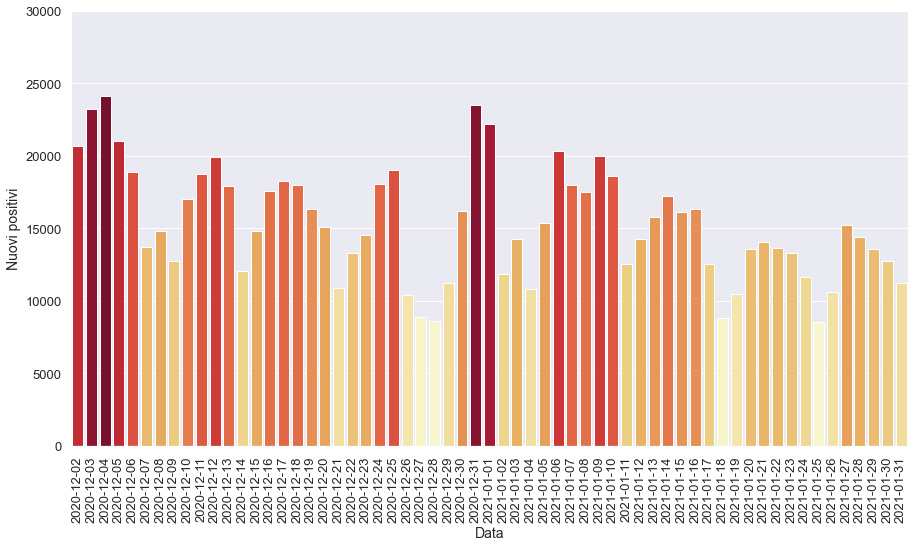

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

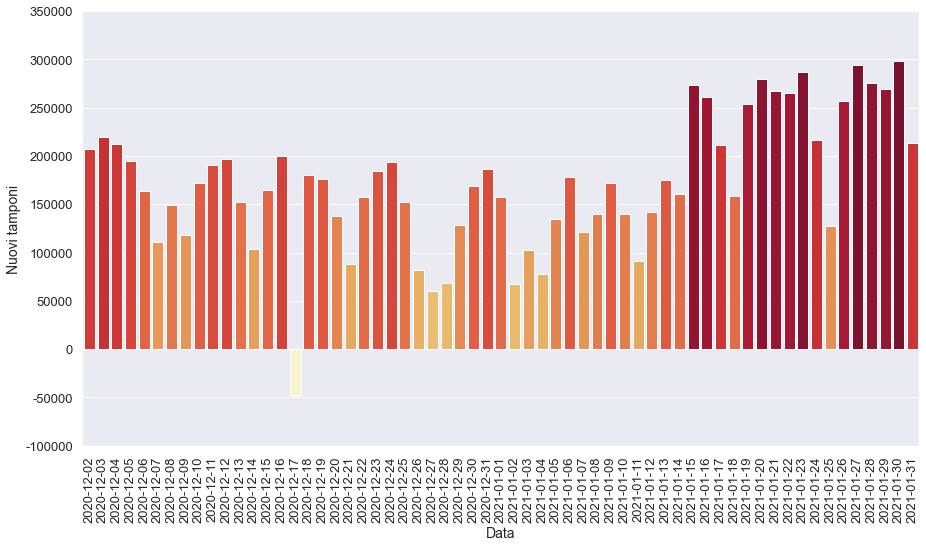

In [9]:
# New swabs
y_col = 'nuovi_tamponi'
fig = bp.draw_bar_plot(y_col=y_col)

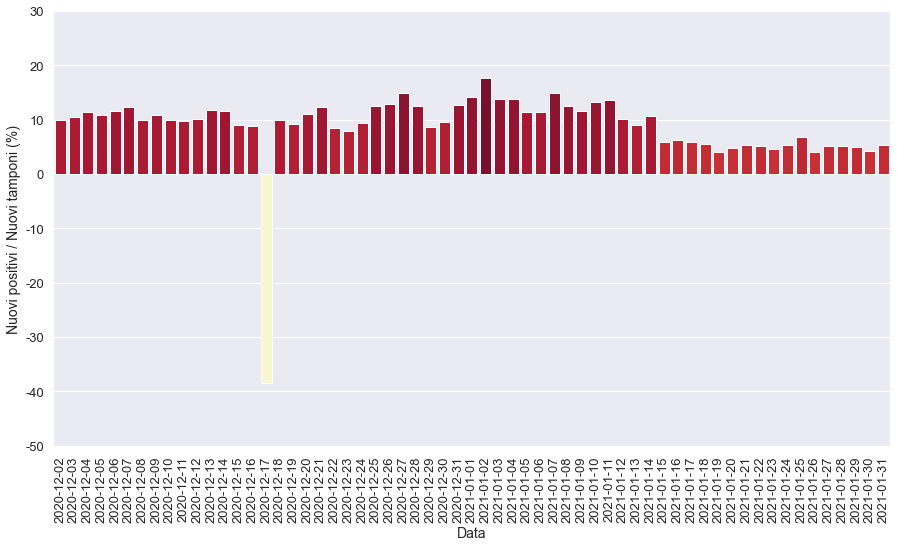

In [10]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

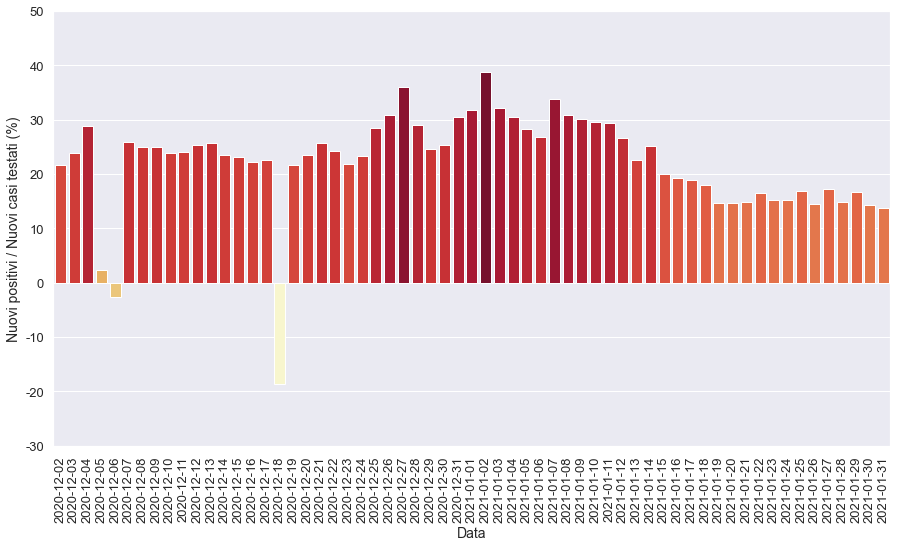

In [11]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

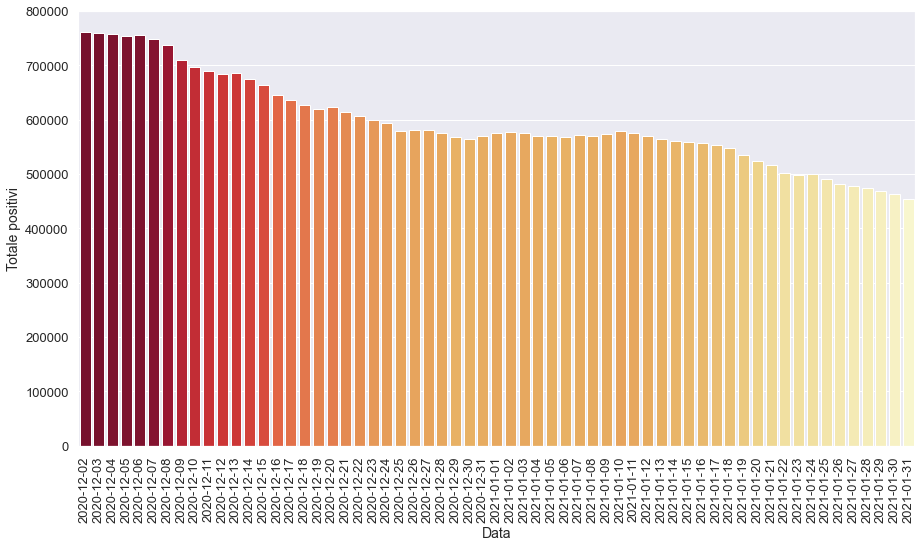

In [12]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

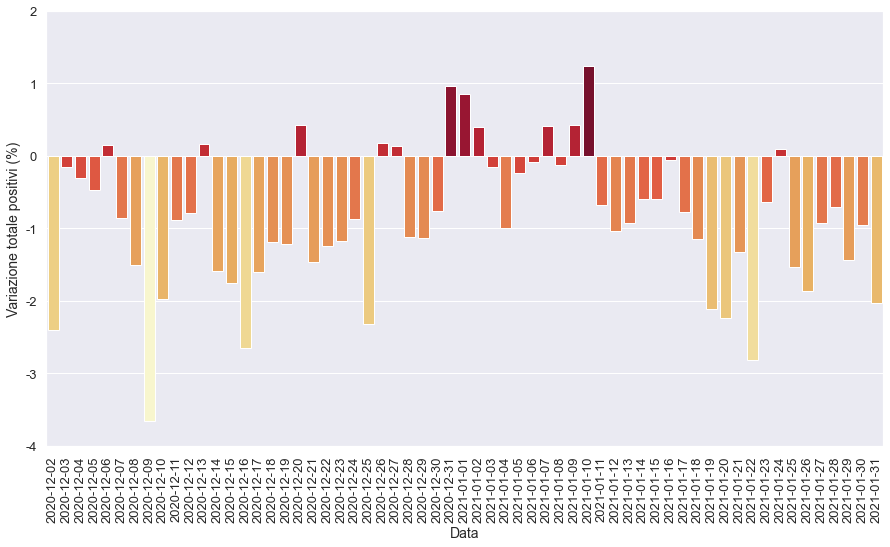

In [13]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

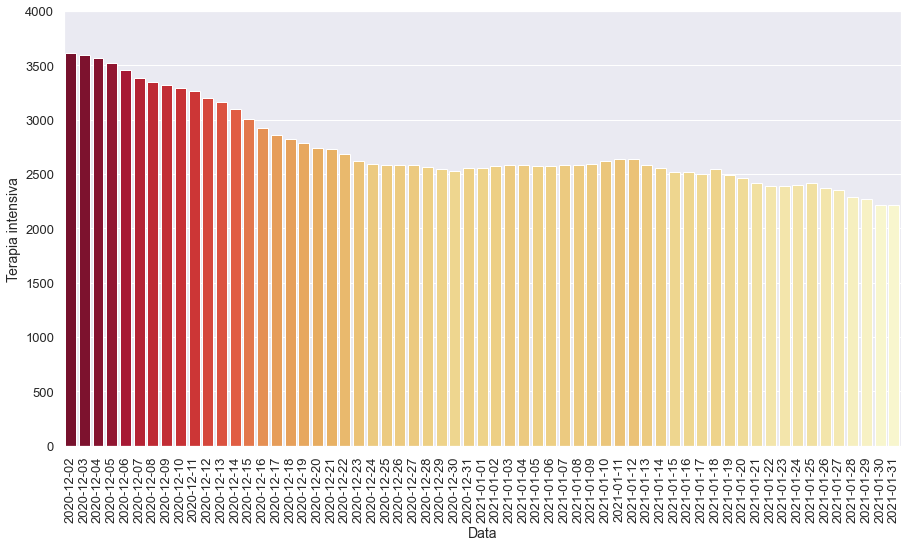

In [14]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

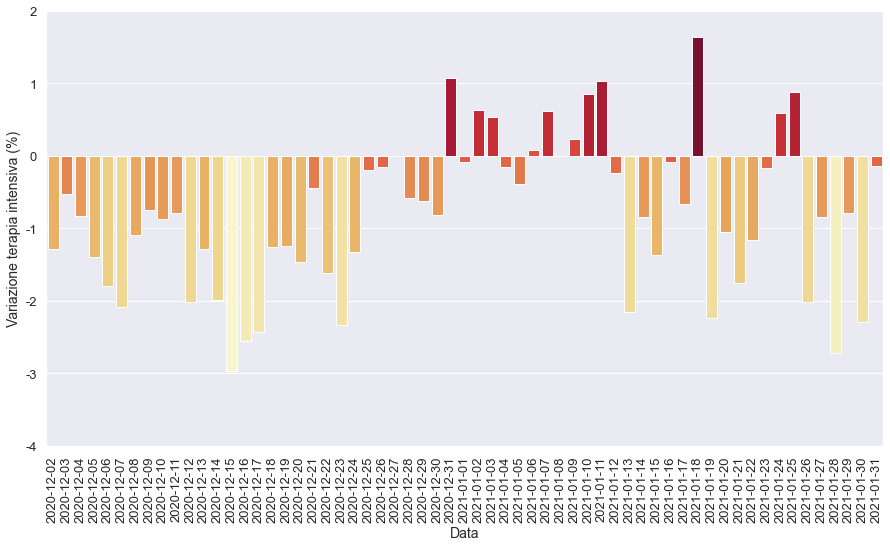

In [15]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

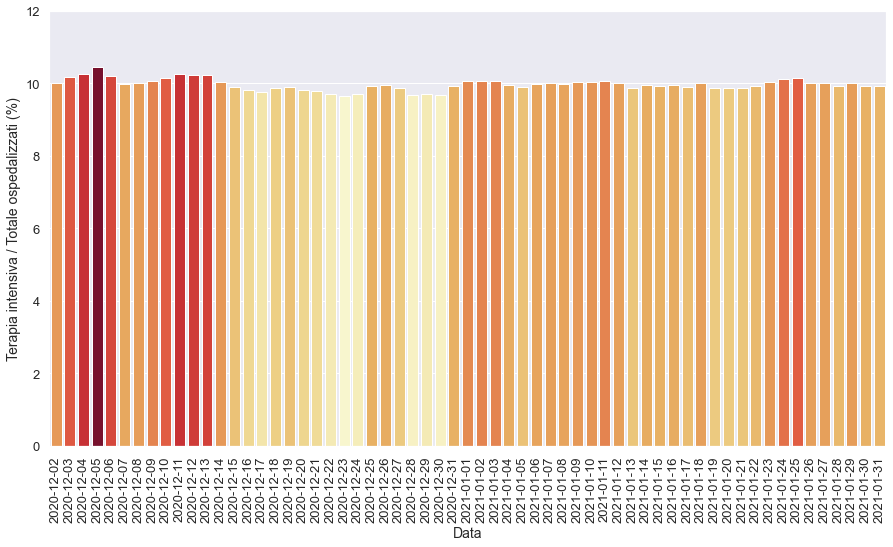

In [16]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

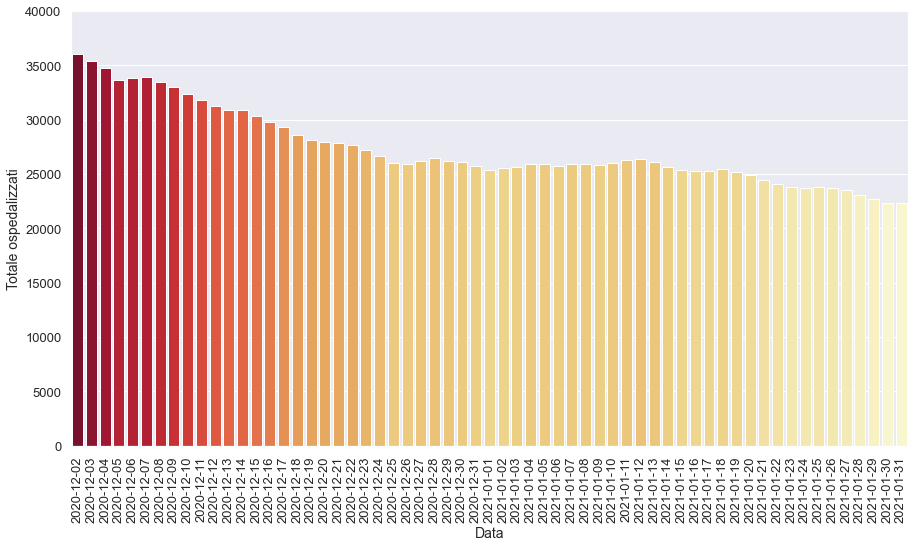

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

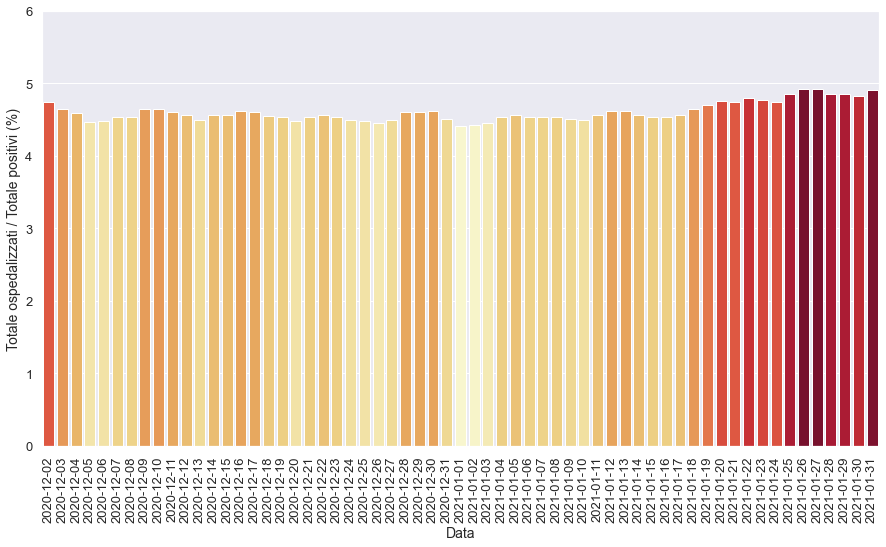

In [18]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

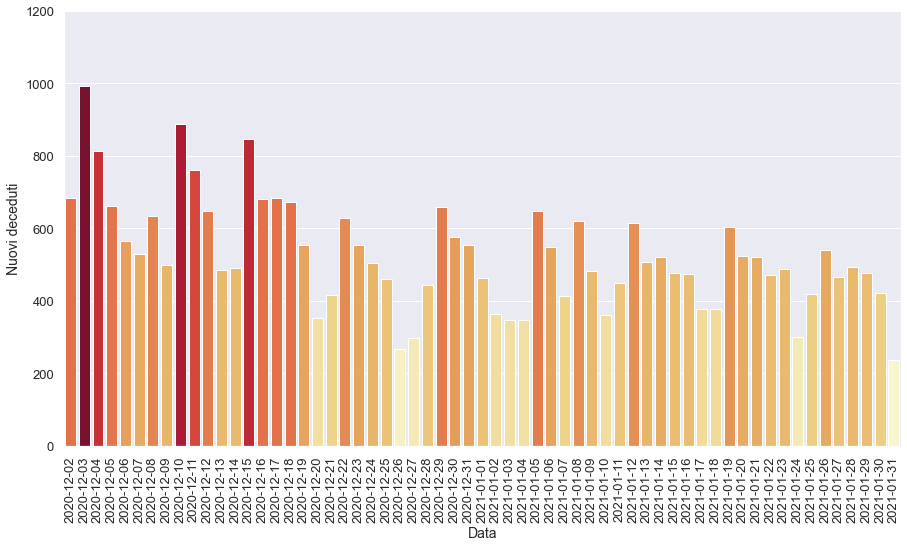

In [19]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

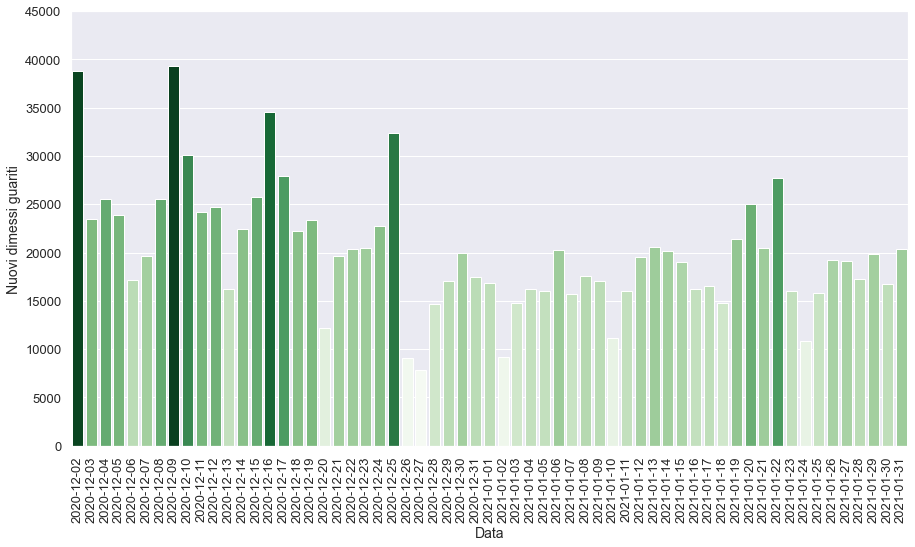

In [20]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [21]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n;

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_dimessi_guariti,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-01T17:00:00,22822,2553,25375,549392,574767,4871,22211,1479988,74621,...,16877.0,462.0,157524.0,70010.0,10.06,4.41,14.10,31.73,-0.08,0.85
1,2021-01-02T17:00:00,22948,2569,25517,551545,577062,2295,11831,1489154,74985,...,9166.0,364.0,67174.0,30451.0,10.07,4.42,17.61,38.85,0.63,0.40
2,2021-01-03T17:00:00,23075,2583,25658,550556,576214,-848,14245,1503900,75332,...,14746.0,347.0,102974.0,44310.0,10.07,4.45,13.83,32.15,0.54,-0.15
3,2021-01-04T17:00:00,23317,2579,25896,544562,570458,-5756,10800,1520106,75680,...,16206.0,348.0,77993.0,35417.0,9.96,4.54,13.85,30.49,-0.15,-1.00
4,2021-01-05T17:00:00,23395,2569,25964,543197,569161,-1297,15378,1536129,76329,...,16023.0,649.0,135106.0,54512.0,9.89,4.56,11.38,28.21,-0.39,-0.23
5,2021-01-06T17:00:00,23174,2571,25745,542967,568712,-449,20331,1556356,76877,...,20227.0,548.0,178596.0,75719.0,9.99,4.53,11.38,26.85,0.08,-0.08
6,2021-01-07T17:00:00,23291,2587,25878,545177,571055,2343,18020,1572015,77291,...,15659.0,414.0,121275.0,53423.0,10.00,4.53,14.86,33.73,0.62,0.41
7,2021-01-08T17:00:00,23313,2587,25900,544489,570389,-666,17533,1589590,77911,...,17575.0,620.0,140267.0,56858.0,9.99,4.54,12.50,30.84,0.00,-0.12
8,2021-01-09T17:00:00,23260,2593,25853,546989,572842,2453,19978,1606630,78394,...,17040.0,483.0,172119.0,66417.0,10.03,4.51,11.61,30.08,0.23,0.43
9,2021-01-10T17:00:00,23427,2615,26042,553890,579932,7090,18627,1617804,78755,...,11174.0,361.0,139758.0,63105.0,10.04,4.49,13.33,29.52,0.85,1.24


In [22]:
bp.df = df_n
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

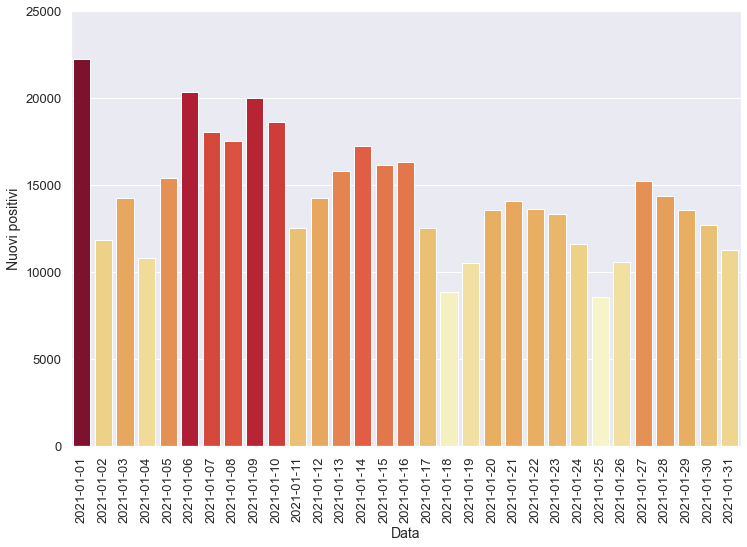

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

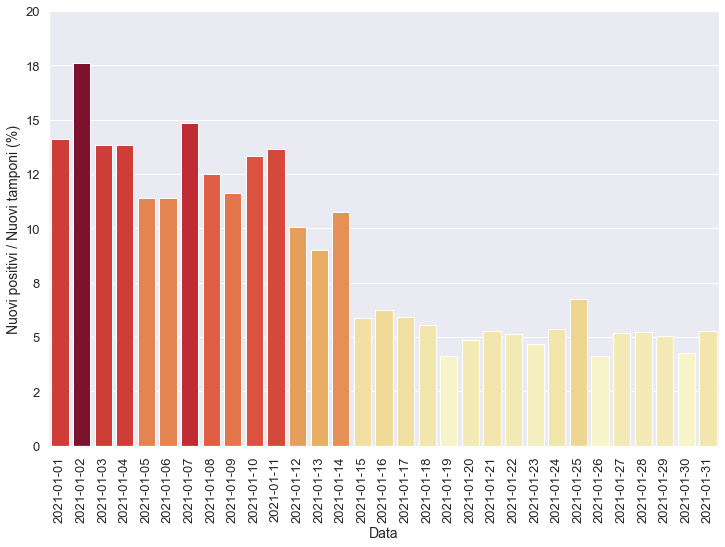

In [24]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

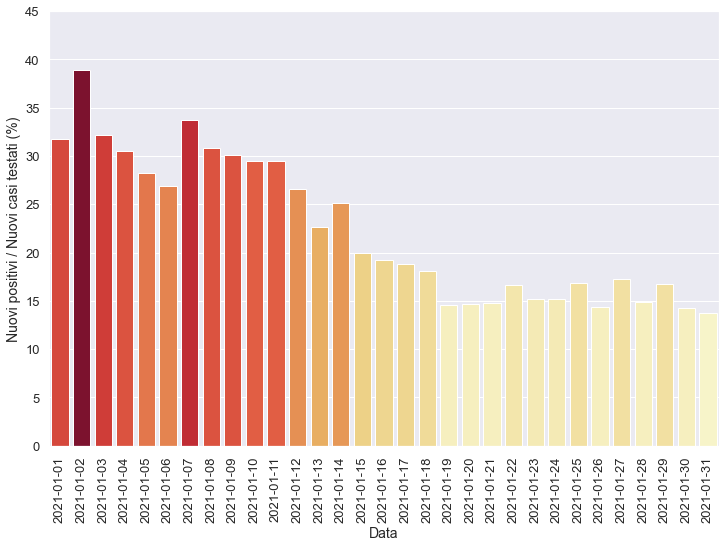

In [25]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

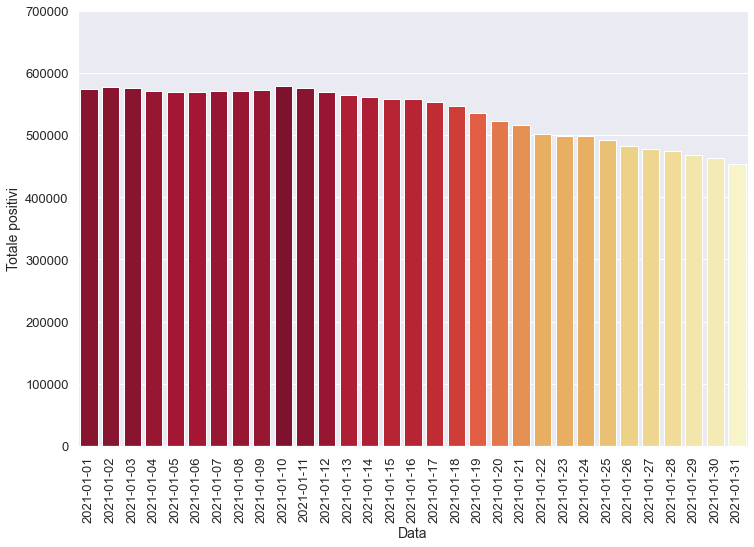

In [26]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

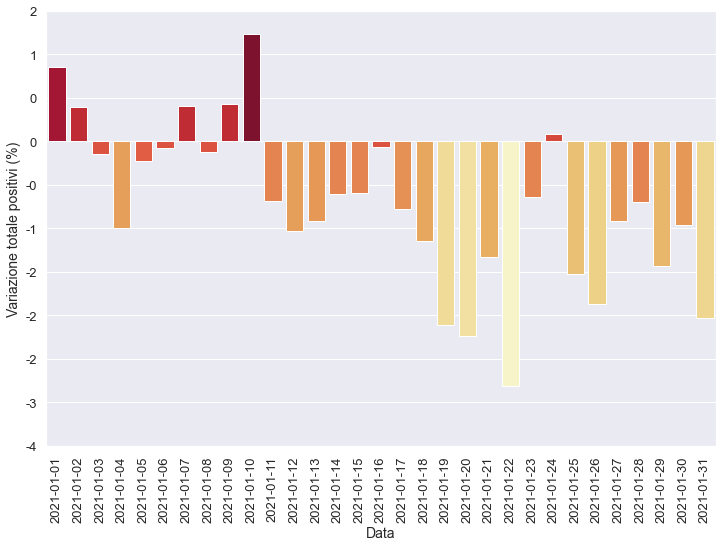

In [27]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

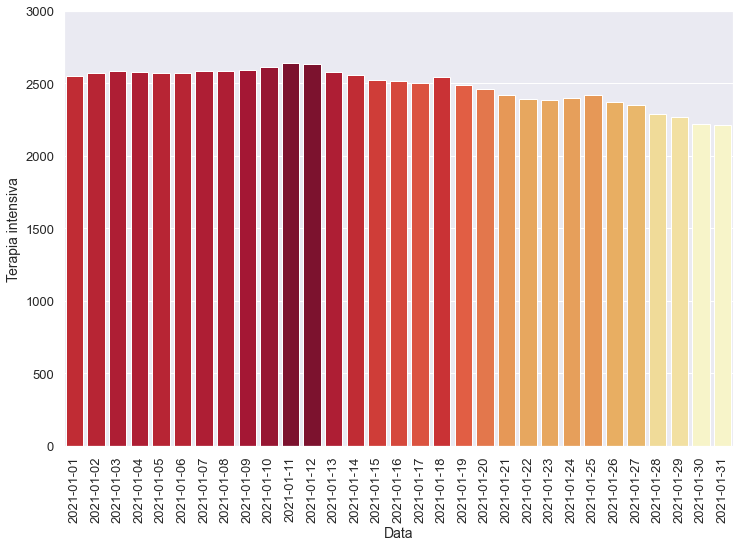

In [28]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

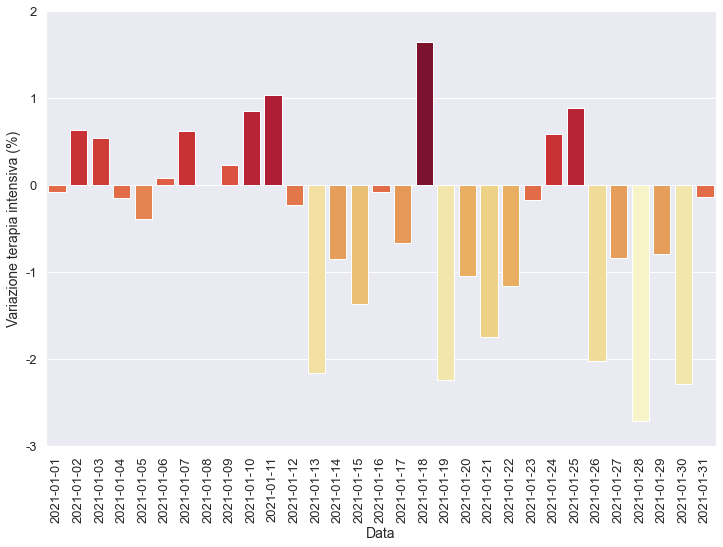

In [29]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

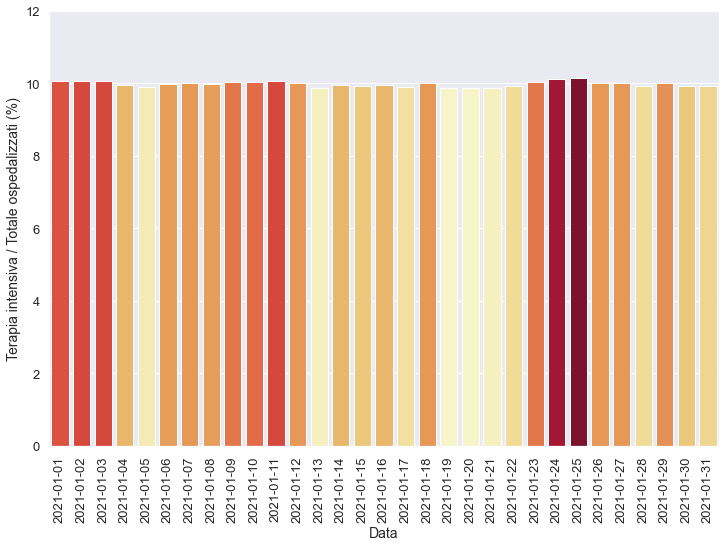

In [30]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

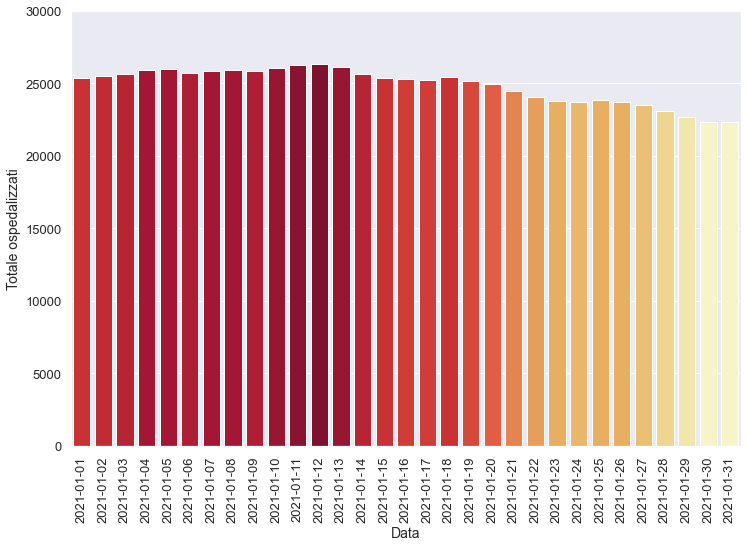

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

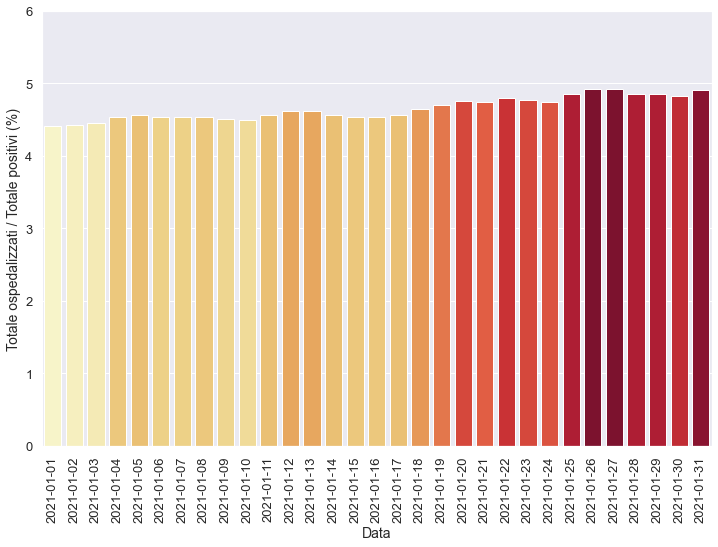

In [32]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

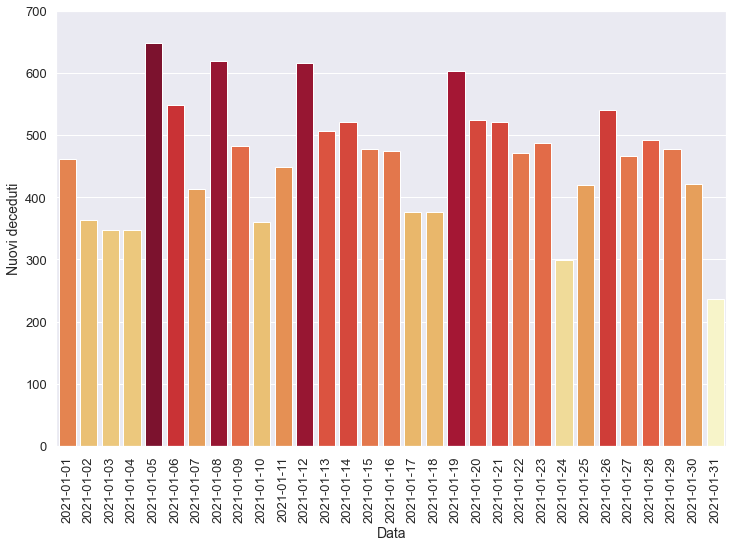

In [33]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

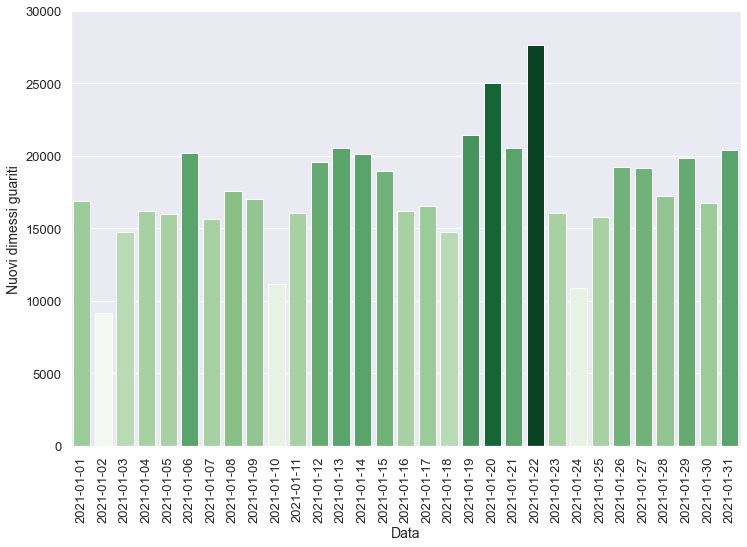

In [34]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [35]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_dimessi_guariti,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-24T17:00:00,21309,2400,23709,475569,499278,444,11629,1882074,85461,...,10885.0,299.0,216211.0,76297.0,10.12,4.75,5.38,15.24,0.59,0.09
1,2021-01-25T17:00:00,21424,2421,23845,467785,491630,-7648,8562,1897861,85881,...,15787.0,420.0,126931.0,50925.0,10.15,4.85,6.75,16.81,0.88,-1.53
2,2021-01-26T17:00:00,21355,2372,23727,458690,482417,-9213,10593,1917117,86422,...,19256.0,541.0,256287.0,73626.0,10.00,4.92,4.13,14.39,-2.02,-1.87
3,2021-01-27T17:00:00,21161,2352,23513,454456,477969,-4448,15204,1936289,86889,...,19172.0,467.0,293770.0,88275.0,10.00,4.92,5.18,17.22,-0.84,-0.92
4,2021-01-28T17:00:00,20778,2288,23066,451551,474617,-3352,14372,1953509,87381,...,17220.0,492.0,275579.0,96755.0,9.92,4.86,5.22,14.85,-2.72,-0.70
5,2021-01-29T17:00:00,20397,2270,22667,445157,467824,-6793,13574,1973388,87858,...,19879.0,477.0,268750.0,81172.0,10.01,4.85,5.05,16.72,-0.79,-1.43
6,2021-01-30T17:00:00,20098,2218,22316,441036,463352,-4472,12715,1990152,88279,...,16764.0,421.0,298010.0,89375.0,9.94,4.82,4.27,14.23,-2.29,-0.96
7,2021-01-31T17:00:00,20096,2215,22311,431657,453968,-9384,11252,2010548,88516,...,20396.0,237.0,213364.0,81590.0,9.93,4.91,5.27,13.79,-0.14,-2.03


In [36]:
bp.df = df_n
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

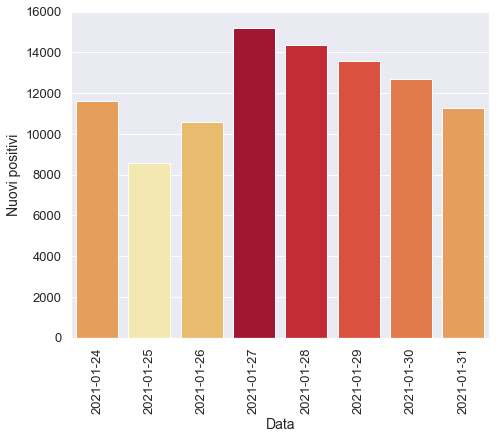

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

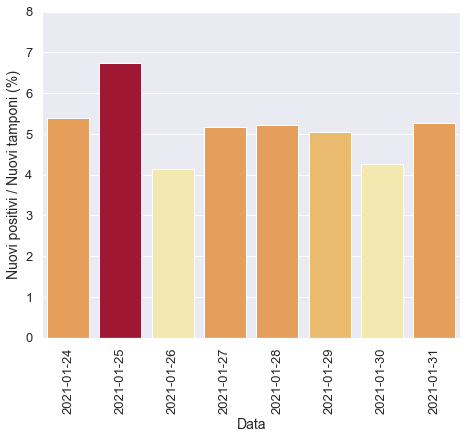

In [38]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

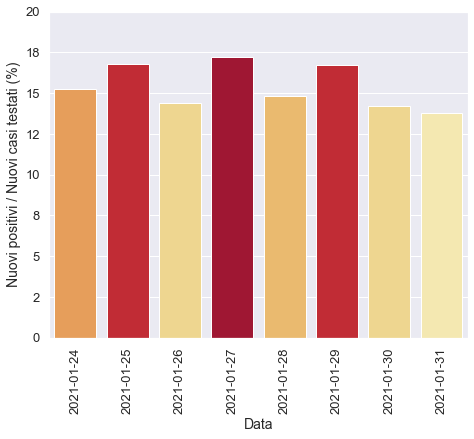

In [39]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

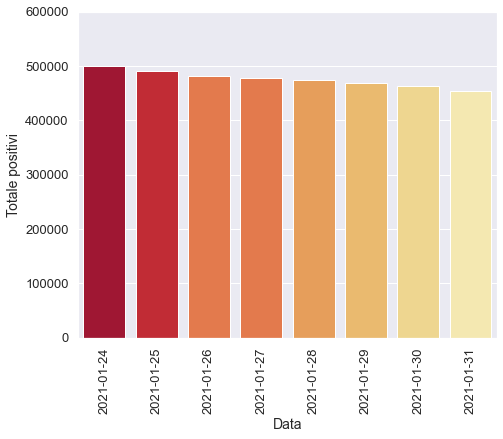

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

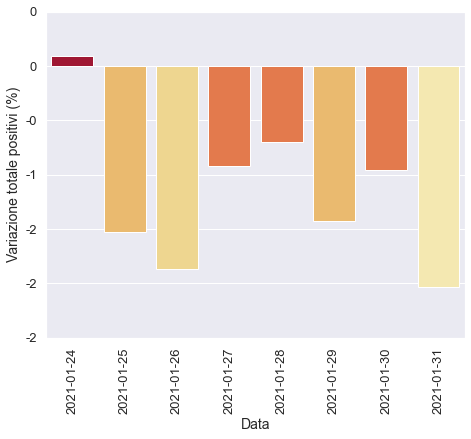

In [41]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

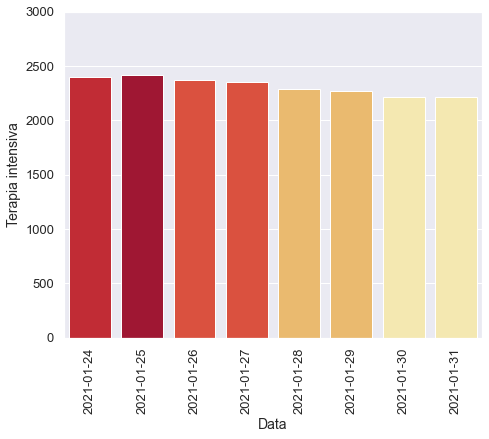

In [42]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

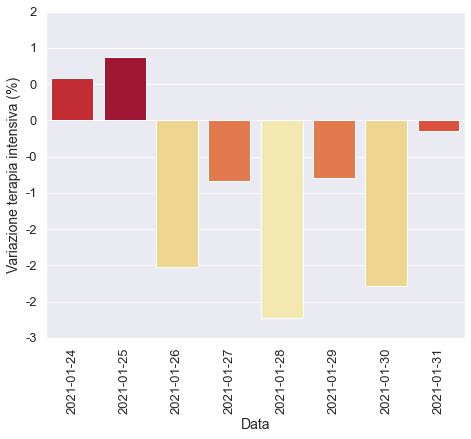

In [43]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

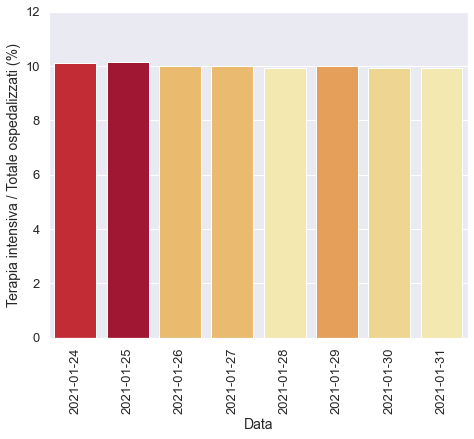

In [44]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

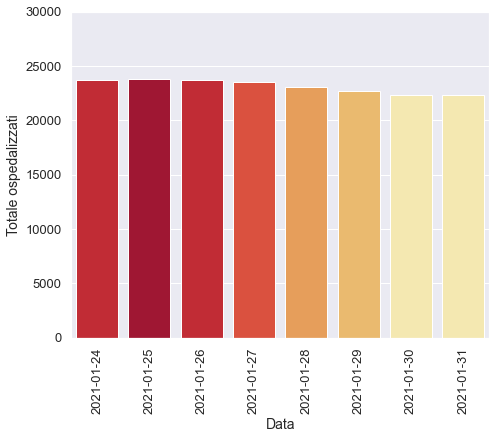

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

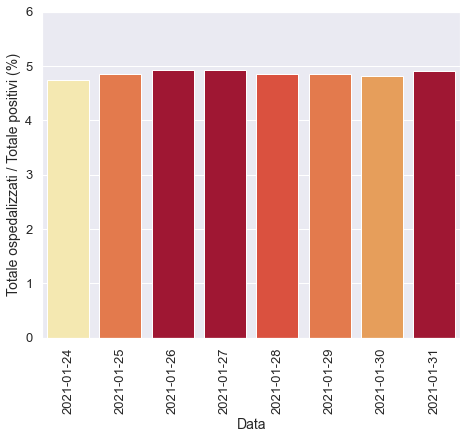

In [46]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

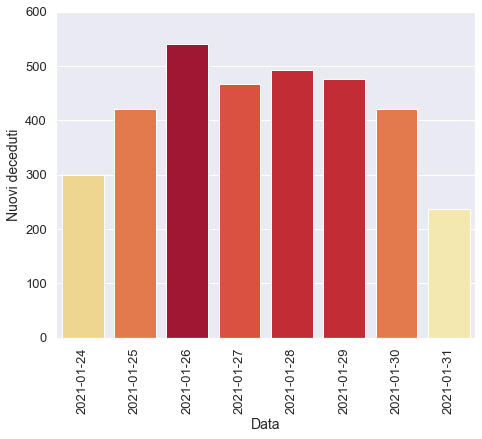

In [47]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

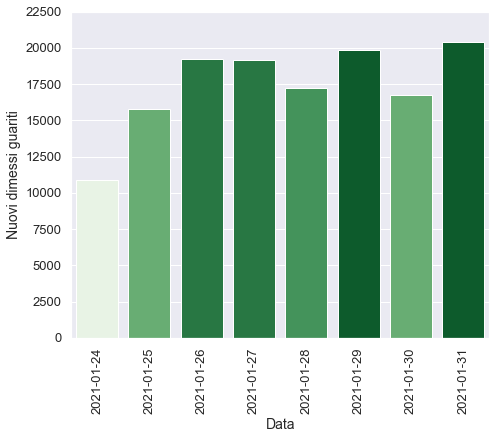

In [48]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)